# Brain Tumor detection from MRI scan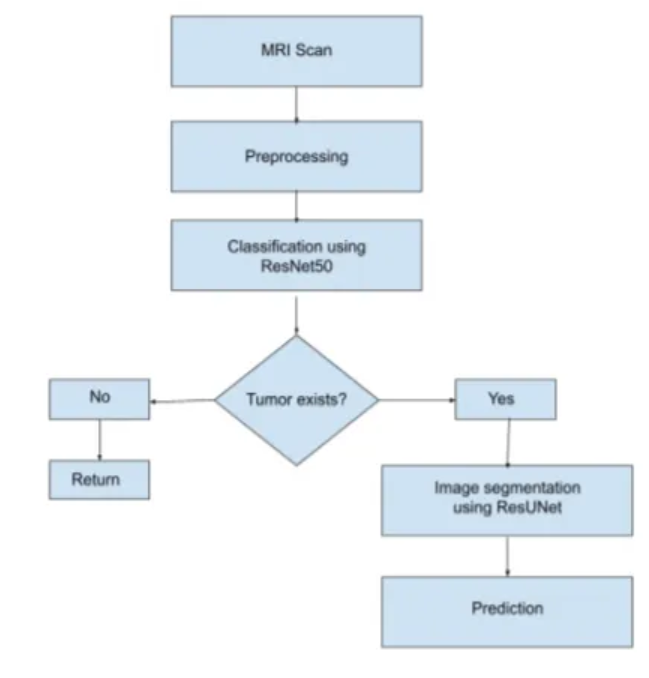

Brain tumor is a serious disease occurring in a human being. Medical treatment process mainly depends on tumor types and its location. The final decision of neurospecialists and radiologist for the tumor diagnosis mainly depend on evaluation of Magnetic Resonance Imaging (MRI) images.

Problem definition: autonomously detecting brain tumors or other anomalies.

The system architecture of the proposed system is illustrated in the figure. It can be divided into classification, segmentation and prediction. (Only the segmentation is treated below)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read an image file named "brain_tumour.jpeg" using OpenCV
image = cv2.imread("brain.jpg")

In [ ]:
# Convert the color space of the loaded image from BGR to RGB using OpenCV
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
# Reshape the image to a 2D array of pixel values with 3 channels (RGB)
pixel_values = image1.reshape((-1, 3))

# Convert the pixel values to floating-point format
pixel_values = np.float32(pixel_values)


In [ ]:
# Define criteria for the k-means clustering algorithm using OpenCV
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

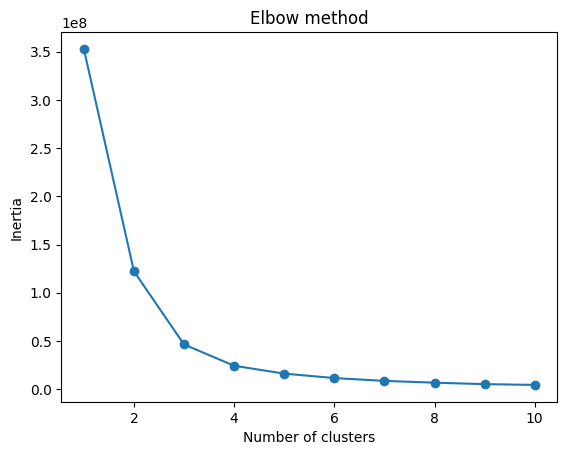

In [ ]:
# Initialize an empty list to store inertia values for different numbers of clusters
inertias = []

# Loop through different numbers of clusters (from 1 to 10)
for i in range(1, 11):
    # Apply k-means clustering to the pixel values with the current number of clusters
    inertia, labels, centers = cv2.kmeans(pixel_values, i, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Store the inertia value in the list
    inertias.append(inertia)

# Plot the Elbow method to find the optimal number of clusters
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Specify the desired number of clusters (k)
k = 2

# Apply k-means clustering to the pixel values with the specified number of clusters
inertia, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Print the cluster centers (centers)
print(centers)

[[140.84029 140.84029 140.84029]
 [ 35.06858  35.06858  35.06858]]


In [ ]:
# Convert the cluster centers to unsigned 8-bit integers (uint8)
centers = np.uint8(centers)

# Display the cluster centers
centers

array([[140, 140, 140],
       [ 35,  35,  35]], dtype=uint8)

In [ ]:
# Flatten the labels array to a 1D array
labels = labels.flatten()

# Print the flattened array of labels
print(labels)

[1 1 1 ... 1 1 1]


In [ ]:
segmented_image = centers[labels.flatten()]
print(segmented_image)

[[35 35 35]
 [35 35 35]
 [35 35 35]
 ...
 [35 35 35]
 [35 35 35]
 [35 35 35]]


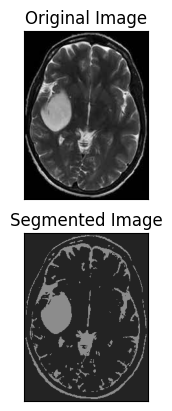

In [ ]:
# Reshape the segmented image to match the shape of the original image
segmented_image = segmented_image.reshape(image1.shape)

# Display the original and segmented images side by side using Matplotlib subplots
plt.subplot(211), plt.imshow(image1)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(212), plt.imshow(segmented_image)
plt.title('Segmented Image'), plt.xticks([]), plt.yticks([])

plt.show()